# TP 3 - Métodos No Paramétricos

## Ejercicio 2

* _Graficar una partición del espacio de características habiendo muestreado dos clases distintas._

## Comentarios

Como función ventana también utilizo una normal estándar.

In [1]:
clc;

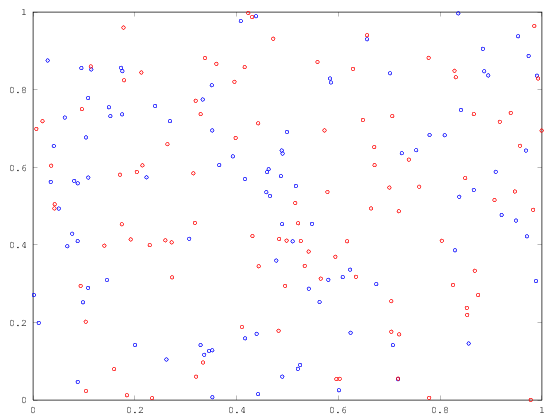

In [121]:
N = 100;

A = rand(N, 2);
At = A';
B = rand(N, 2);
Bt = B';

hold on;
scatter(A(:,1), A(:,2), 10, "b");
scatter(B(:,1), B(:,2), 10, "r");

In [122]:
%%time
PADDING = 0.05;
GRANULARITY = 50;

function res = cartesian_product(v, w)
  [X, Y] = meshgrid(v, w);
  res = [X(:) Y(:)];
endfunction

h_n = 1/N;

pdf_A = pdf_B = zeros(GRANULARITY * GRANULARITY, 1);

bx = by = linspace(0 + PADDING, 1 - PADDING, GRANULARITY)';
box = cartesian_product(bx, by);
for i = 1:rows(A) % = rows(B)
  pdf_A += mvnpdf((box - A(i,:)) / h_n, [0 0], [1 0; 0 1]) / h_n;
  pdf_B += mvnpdf((box - B(i,:)) / h_n, [0 0], [1 0; 0 1]) / h_n;
end

pdf_A = reshape(pdf_A, [GRANULARITY, GRANULARITY]);
pdf_B = reshape(pdf_B, [GRANULARITY, GRANULARITY]);

Time: 0.9901671409606934 seconds.



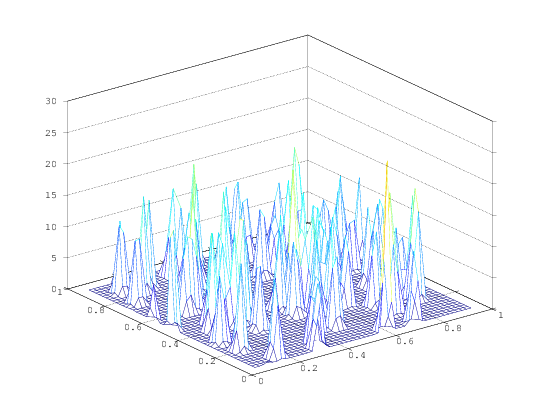

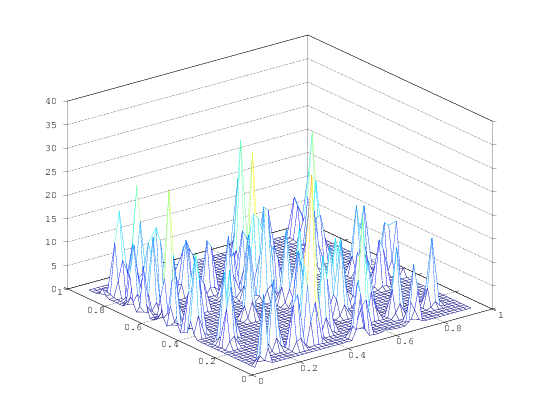

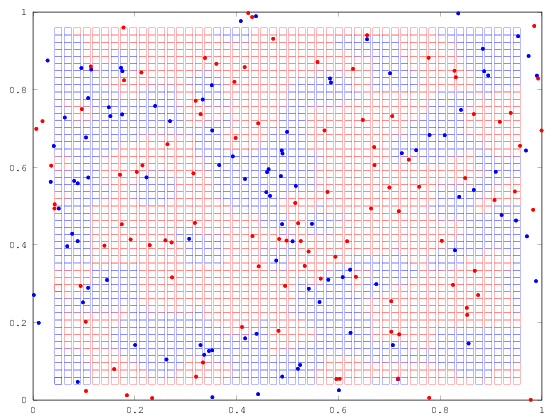

In [123]:
figure(1);
mesh(bx, by, pdf_A);

figure(2);
mesh(bx, by, pdf_B);

figure(3);
hold on;
[X Y] = meshgrid(bx, by);
agt_idx = find(pdf_A > pdf_B);
bgt_idx = find(!(pdf_A > pdf_B));
scatter(X(agt_idx), Y(agt_idx), 20, "b", "s")
scatter(X(bgt_idx), Y(bgt_idx), 20, "r", "s")
scatter(A(:,1), A(:,2), 10, "b", "filled");
scatter(B(:,1), B(:,2), 10, "r", "filled");